In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from load_data import *

# Data Exploration

In [2]:
data_path = "../data/with_stock_data.csv"
frame = pd.read_csv(data_path)
frame.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'city',
       ' state', 'country', ' linkedin url', 'current employee estimate',
       'total employee estimate', 'Score', 'reviews', 'salaries', 'interviews',
       'KMT', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe',
       'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue',
       'enterprise_value_ebitda', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_share', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth',
       'total_cash', 'total_cash_per_share', 'total_dept',
       'total_dept_per_equity', 'operating_cash_flow',
       'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week',
       'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low'],
      dtype='object')

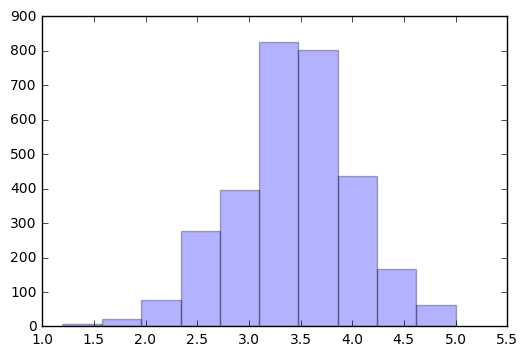

In [3]:
frame['Score']
plt.hist(frame['Score'], alpha=0.3)
plt.show()

# Feature Selection

In [4]:
# Pick Features
non_categorical_columns = ['year founded', 'current employee estimate', 'total employee estimate', 'reviews', 'salaries', 'interviews', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe', 'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue', 'enterprise_value_ebitda', 'profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share', 'quarterly_revenue_share', 'gross_profit', 'ebitda', 'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth', 'total_cash', 'total_cash_per_share', 'total_dept', 'total_dept_per_equity', 'operating_cash_flow', 'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week', 'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low']
categorical_columns = ['industry', 'size range', 'city', ' state', 'country']

In [50]:
x_train, y_train, x_test, y_test, x_test_unseen, y_test_unseen = load_and_clean(non_categorical_columns, categorical_columns)

# General Functions

In [6]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

def evaluateRegressionModel(model, x, y):
    y_pred = np.clip(model.predict(x), 0, 5).flatten()
    
    # MSE
    print("Mean Square Error:")
    mse = mean_squared_error(y, y_pred)
    print(mse)
    
    # Accuracy
    print("Accuracy:")
    accuracy = sum(np.abs(y_pred - y.values.flatten()) <  0.25)/ y.shape[0]
    print(accuracy)
    
    # Confusion matrix
    y_pred = convertToClass(y_pred, 10)
    y_actual = convertToClass(y, 10)
    confusion_m = confusion_matrix(y_actual, y_pred)
    print("Confusion Matrix:")
    print(confusion_m)
    return (mse, accuracy, confusion_m)

def evaluateClassificationModel(model, x, y):
    y_pred = model.predict(x)
    confusion_m = confusion_matrix(y, y_pred)
    accuracy = model.score(x, y)
    print("Accuracy:")
    print(accuracy)
    print("Confusion Matrix:")
    print(confusion_m)
    return (accuracy, confusion_m)

# REGRESSION MODEL SECTION

# Linear Regression (L1 Regularization)

In [7]:
linRegL1 = linear_model.Lasso(alpha=0.1, normalize=False)
linRegL1.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL1, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.3233641563026438
Accuracy:
0.3664091093940626
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   1  50   0   0   0]
 [  0   0   0   1   2 243   0   0   0]
 [  0   0   0   0  18 617   0   0   0]
 [  0   0   0   0   7 832   6   1   0]
 [  0   0   0   0   3 473  14   2   0]
 [  0   0   0   0   0 147   2   1   0]
 [  0   0   0   0   0  31   1   0   1]]


In [9]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL1, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.3695771178928576
Accuracy:
0.34651162790697676
Confusion Matrix:
[[  0   0   0   0   2   0   0   0]
 [  0   0   0   0   9   0   0   0]
 [  0   0   0   0  42   0   0   0]
 [  0   0   0   1 107   0   0   0]
 [  0   0   0   3 134   1   0   0]
 [  0   0   0   1  91   3   0   0]
 [  0   0   0   1  30   0   0   0]
 [  0   0   0   0   5   0   0   0]]


# Linear Regression (L2 Regularization)

In [10]:
# Modeling
linRegL2 = Ridge(alpha=1.0, normalize=False)
linRegL2.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL2, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.18118945615222032
Accuracy:
0.5189101260675071
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0]
 [  0   0   0   4   0   1   0   0   0]
 [  0   0   0  18  21  12   0   0   0]
 [  0   0   0  22 149  72   3   0   0]
 [  0   0   0   6 301 316  12   0   0]
 [  0   0   0   0 106 686  54   0   0]
 [  0   0   0   0  28 338 124   2   0]
 [  0   0   0   0   4  71  68   7   0]
 [  0   0   0   0   1  11  14   6   1]]


In [12]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL2, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.4100846558578639
Accuracy:
0.32325581395348835
Confusion Matrix:
[[ 0  0  0  0  2  0  0  0]
 [ 0  0  0  2  7  0  0  0]
 [ 0  0  2 17 20  3  0  0]
 [ 0  0  2 25 74  7  0  0]
 [ 0  0  1 30 91 16  0  0]
 [ 0  0  3 17 63 11  1  0]
 [ 0  0  0  8 20  3  0  0]
 [ 0  0  0  1  4  0  0  0]]


# Linear Regression

In [13]:
# Modeling
linReg = LinearRegression().fit(x_train, y_train)

In [14]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linReg, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.1632240352221002
Accuracy:
0.6132574217161447
Confusion Matrix:
[[  0   1   0   0   0   0   0   0   0]
 [  0   1   1   2   1   0   0   0   0]
 [  0   0  19   4  16  12   0   0   0]
 [  0   0   5  88  87  62   4   0   0]
 [  0   0   0  28 336 248  23   0   0]
 [  0   0   0   2 135 607 102   0   0]
 [  0   0   0   0  31 240 213   8   0]
 [  0   0   0   0   5  56  48  39   2]
 [  0   0   0   0   1   9  10   2  11]]


In [15]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linReg, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.5791073624863085
Accuracy:
0.2930232558139535
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  2  6  0  1  0]
 [ 0  0  0  5 15 14  6  1  1]
 [ 1  0  4  8 24 52 15  3  1]
 [ 0  1  1  6 26 81 21  1  1]
 [ 0  0  3  3 18 49 19  1  2]
 [ 0  0  0  1  9 14  6  1  0]
 [ 0  0  0  0  1  3  1  0  0]]


# Support Vector Regression

In [57]:
# Modeling
svr = SVR(C = 0.1).fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(svr, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.2532541899414199
Accuracy:
0.47458316388775923
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  51   0   0   0]
 [  0   0   0   0   0 246   0   0   0]
 [  0   0   0   0   0 635   0   0   0]
 [  0   0   0   0   0 846   0   0   0]
 [  0   0   0   0   0 492   0   0   0]
 [  0   0   0   0   0 150   0   0   0]
 [  0   0   0   0   0  33   0   0   0]]


In [59]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(svr, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.369694114533127
Accuracy:
0.3302325581395349
Confusion Matrix:
[[  0   0   0   0   2   0   0   0]
 [  0   0   0   0   9   0   0   0]
 [  0   0   0   0  42   0   0   0]
 [  0   0   0   0 108   0   0   0]
 [  0   0   0   0 138   0   0   0]
 [  0   0   0   0  95   0   0   0]
 [  0   0   0   0  31   0   0   0]
 [  0   0   0   0   5   0   0   0]]


# CLASSIFICATION MODEL SECTION

In [19]:
k = 10
y_train = convertToClass(y_train, k)
y_test = convertToClass(y_test, k)
print("Ran.")

Ran.


# Softmax

In [20]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(softmax, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.3082553883692558
Confusion Matrix:
[[  0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   1   4   0   0   0]
 [  0   0   0   0   6  28  17   0   0]
 [  0   0   0   0  43 151  49   3   0]
 [  2   0   0   0  90 411 126   6   0]
 [  0   1   1   0 127 537 172   8   0]
 [  0   0   0   0  79 283 128   2   0]
 [  0   0   0   0  26  85  36   3   0]
 [  0   0   0   0   5  22   5   1   0]]


In [22]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(softmax, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.27674418604651163
Confusion Matrix:
[[ 0  0  0  0  1  1  0  0]
 [ 0  0  0  2  4  3  0  0]
 [ 0  0  0  5 33  4  0  0]
 [ 0  0  0 10 84 14  0  0]
 [ 0  0  0 19 85 32  2  0]
 [ 0  0  0  7 63 24  1  0]
 [ 0  0  0  4 19  8  0  0]
 [ 0  0  0  1  2  2  0  0]]


# Support Vector Machine, Kernel = rbf

In [23]:
svm_rbf = SVC(gamma = 'auto', kernel='rbf', C=.8)
svm_rbf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.9003660024400163
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  51   0   0   0]
 [  0   0   0 244   0   2   0   0   0]
 [  0   0   0   0 635   0   0   0   0]
 [  0   0   0   0   0 846   0   0   0]
 [  0   0   0   0   0   3 489   0   0]
 [  0   0   0   0   0 150   0   0   0]
 [  0   0   0   0   0  33   0   0   0]]


In [25]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.3209302325581395
Confusion Matrix:
[[  0   0   0   0   2   0   0   0]
 [  0   0   0   0   9   0   0   0]
 [  0   0   0   0  42   0   0   0]
 [  0   0   0   0 108   0   0   0]
 [  0   0   0   0 138   0   0   0]
 [  0   0   0   0  95   0   0   0]
 [  0   0   0   0  31   0   0   0]
 [  0   0   0   0   5   0   0   0]]


# Support Vector Machine, Kernel = linear

In [26]:
svm_linear = SVC(gamma = 'auto', kernel='linear', C=1, max_iter=5000)
svm_linear.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_linear, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.10573403822692151
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0]
 [  0   0   0   4   1   0   0   0   0]
 [  0   0   3  41   2   0   0   2   3]
 [  0   2  11 211   2   2   0  11   7]
 [  1  14  29 516  14   6   2  38  15]
 [  1  17  55 658  21  18   3  52  21]
 [  1   6  44 352  14  18   5  38  14]
 [  0   4  13 118   1   4   0   7   3]
 [  0   0   3  24   0   0   0   4   2]]


In [28]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_linear, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.10465116279069768
Confusion Matrix:
[[  0   0   2   0   0   0   0   0]
 [  1   0   5   1   0   0   0   2]
 [  1   4  34   0   0   0   2   1]
 [  0   6  86   2   1   0  12   1]
 [  2   7 106   3   3   1  12   4]
 [  2   6  70   1   4   1   6   5]
 [  0   2  22   0   1   0   5   1]
 [  0   0   4   0   0   0   1   0]]


# Decision Trees

In [29]:
tree = tree.DecisionTreeClassifier(max_depth = 15)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(tree, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.7592517283448557
Confusion Matrix:
[[  1   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   3   0   1   0]
 [  0   0  19   1  21  10   0   0   0]
 [  0   0   2 119  72  49   3   1   0]
 [  0   0   0   3 550  74   4   4   0]
 [  0   0   2   3 103 724  10   4   0]
 [  0   0   0  10  69  66 345   2   0]
 [  0   0   2   5  29  29   1  84   0]
 [  0   0   0   2   3   2   0   2  24]]


In [31]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(tree, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.27209302325581397
Confusion Matrix:
[[ 0  0  0  0  2  0  0  0]
 [ 0  0  0  1  7  1  0  0]
 [ 0  1  2 17 12  8  1  1]
 [ 0  2  1 44 43 15  3  0]
 [ 0  1 13 48 45 22  6  3]
 [ 0  0  3 35 30 24  3  0]
 [ 0  0  4 10  9  6  2  0]
 [ 0  0  0  2  2  1  0  0]]


# Linear Discriminant Analysis

In [32]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [33]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(lda, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.7031313542090281
Confusion Matrix:
[[  1   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   1   0   0   0]
 [  0   0  35   0   6   5   3   2   0]
 [  0   0   2 155  39  21  22   7   0]
 [  0   0   3  17 484  60  62   7   2]
 [  0   1   3  20 124 571 112  12   3]
 [  0   0   0   8  60  45 372   6   1]
 [  0   0   0   2  22  14  22  90   0]
 [  0   0   0   0   4  10   2   0  17]]


In [34]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(lda, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.26744186046511625
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0]
 [ 1  0  0  0  4  2  1  1  0]
 [ 1  0  1  4 14 12  7  3  0]
 [ 3  0  2  7 36 32 24  4  0]
 [ 0  0  0 10 44 50 26  7  1]
 [ 1  0  4  4 28 26 25  6  1]
 [ 0  0  1  2 11  8  9  0  0]
 [ 0  0  0  0  1  2  2  0  0]]


# QDA

In [35]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y has only 1 sample in class 2.0, covariance is ill defined.

In [ ]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(qda, x_train, y_train)

In [ ]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(qda, x_test, y_test)

# K Nearest Neighbors

In [36]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [37]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(neigh, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.39406262708418055
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   2   3   0   0   0]
 [  0   0   0   1  22  22   5   1   0]
 [  0   0   0  18  74 132  22   0   0]
 [  0   0   1  15 278 293  47   1   0]
 [  0   0   1  17 195 562  70   1   0]
 [  0   0   0  10 135 236 111   0   0]
 [  0   0   0   3  44  80  23   0   0]
 [  0   0   0   1   8  20   4   0   0]]


In [38]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(neigh, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.30930232558139537
Confusion Matrix:
[[ 0  0  0  1  1  0  0  0]
 [ 0  0  0  4  5  0  0  0]
 [ 0  0  1 11 25  5  0  0]
 [ 0  0  3 34 58 13  0  0]
 [ 0  0  1 38 84 15  0  0]
 [ 0  0  3 29 49 14  0  0]
 [ 0  0  2  9 14  6  0  0]
 [ 0  0  0  1  4  0  0  0]]


# PCA

In [43]:
pca = PCA(n_components=5)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [44]:
svm_rbf_pca = SVC(gamma = 'auto', kernel='rbf', C=.8)
svm_rbf_pca.fit(x_train_new, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf_pca, x_train_new, y_train)

ON TRAINING DATA:
Accuracy:
0.8222854819032127
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   4   1   0   0]
 [  0   0   0   1   5  45   0   0   0]
 [  0   0   0 188  20  28  10   0   0]
 [  0   0   0   0 572  61   2   0   0]
 [  0   0   0   2   6 833   5   0   0]
 [  0   0   0   0  30  39 423   0   0]
 [  0   0   0   2  10 121  11   6   0]
 [  0   0   0   0   2  30   1   0   0]]


In [46]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf_pca, x_test_new, y_test)

ON TESTING DATA:
Accuracy:
0.31627906976744186
Confusion Matrix:
[[  0   0   0   1   1   0   0   0]
 [  0   0   0   0   8   1   0   0]
 [  0   0   0   1  40   1   0   0]
 [  0   0   3   9  92   4   0   0]
 [  0   0   2   3 122  11   0   0]
 [  0   0   1   6  83   5   0   0]
 [  0   0   1   2  28   0   0   0]
 [  0   0   1   1   3   0   0   0]]


# Neural Networks

In [47]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 10, 5), random_state=1)
nn.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [48]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(nn, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.22122814152094347
Confusion Matrix:
[[  0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   2   0   3   0   0]
 [  2   0   0   3  19   0  26   1   0]
 [ 28   0   0   4 105   0 106   3   0]
 [ 62   0   0  12 271   0 285   5   0]
 [ 73   0   0  22 309   0 421  21   0]
 [ 49   0   0  18 156   0 265   4   0]
 [ 21   0   0   5  42   0  78   4   0]
 [  3   0   0   0  15   0  15   0   0]]


In [49]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(nn, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.2186046511627907
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0]
 [ 1  0  0  0  3  0  5  0  0]
 [ 4  0  0  0 18  0 19  1  0]
 [16  0  0  4 41  0 45  2  0]
 [12  0  0  2 51  0 71  2  0]
 [ 9  0  0  4 26  0 53  3  0]
 [ 3  0  0  1 11  0 16  0  0]
 [ 0  0  0  0  2  0  2  1  0]]


In [ ]:
# Hidden layers: 20, 10, and 5 worked well